In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import glob
from tensorflow import keras

In [ ]:
incept_v3_pretrained = keras.applications.inception_v3.InceptionV3(
    weights = 'imagenet',
    include_top = True
)

print(incept_v3_pretrained.summary())

<class 'numpy.ndarray'>
(299, 299, 3)
(1, 299, 299, 3)


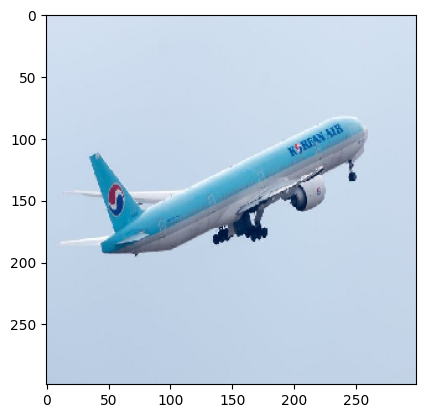

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


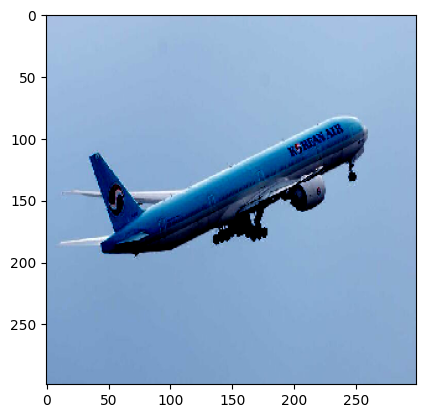

In [75]:
img_path = './fig4/airplane_1.jpg'

img = keras.preprocessing.image.load_img(img_path, target_size=(299, 299))
# print(type(img))

x = keras.preprocessing.image.img_to_array(img)
print(type(x))
print(x.shape)

x = np.expand_dims(x, axis = 0)
print(x.shape)

x = keras.applications.inception_v3.preprocess_input(x)

plt.imshow(img)
plt.show()

plt.imshow(x[0])
plt.show()


In [76]:
output = incept_v3_pretrained.predict(x)
# print(output)

keras.applications.inception_v3.decode_predictions(output, 3)

1/1 [==============================] - 0s 223ms/step


[[('n02690373', 'airliner', 0.8788788),
  ('n04592741', 'wing', 0.03872765),
  ('n04552348', 'warplane', 0.00081294583)]]

In [ ]:
img_cv2 = cv2.imread('./fig4/airplane_1.jpg')

text = 'Airliner, 88%'
cv2.putText(img_cv2, text, (50, 50), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('img', img_cv2)

cv2.waitKey()
cv2.destroyAllWindows()

In [98]:
img_files = os.listdir('./fig4/')
file_paths = []

for i in img_files:
    file_path = './fig4/' + i
    file_paths.append(file_path)
    
for i in file_paths:
    img = keras.preprocessing.image.load_img(i, target_size=(299, 299))

    x = keras.preprocessing.image.img_to_array(img)

    x = np.expand_dims(x, axis = 0)

    x = keras.applications.inception_v3.preprocess_input(x)

    output = incept_v3_pretrained.predict(x)

    print(keras.applications.inception_v3.decode_predictions(output, 3))
    predictions = keras.applications.inception_v3.decode_predictions(output, 1)
    img = img.resize((500, 500))
    
    for pred in predictions[0]:
        print(pred[1], ": ", pred[2]*100)
        text = f"{pred[1]}: {pred[2]*100:.2f}%"

        # OpenCV를 사용하여 이미지에 텍스트로 예측 결과 표시
        img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        
        cv2.putText(img_cv, text, (10, 50), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.imshow("Image with Prediction", img_cv)
        cv2.waitKey(500)
    
    if img is None:
        break
    
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 217ms/step
[[('n02690373', 'airliner', 0.8788788), ('n04592741', 'wing', 0.03872765), ('n04552348', 'warplane', 0.00081294583)]]
airliner :  87.88787722587585
1/1 [==============================] - 0s 197ms/step
[[('n03532672', 'hook', 0.22608066), ('n03584254', 'iPod', 0.0766738), ('n04317175', 'stethoscope', 0.066958755)]]
hook :  22.608065605163574
1/1 [==============================] - 0s 180ms/step
[[('n07742313', 'Granny_Smith', 0.92358464), ('n07768694', 'pomegranate', 0.005843065), ('n04376876', 'syringe', 0.0026890715)]]
Granny_Smith :  92.35846400260925
1/1 [==============================] - 0s 194ms/step
[[('n07753592', 'banana', 0.9981968), ('n07747607', 'orange', 0.00027628886), ('n03633091', 'ladle', 0.00020023357)]]
banana :  99.81967806816101
1/1 [==============================] - 0s 200ms/step
[[('n04285008', 'sports_car', 0.56877214), ('n02974003', 'car_wheel', 0.13554658), ('n04037443', 'racer', 0.13464788)]]
sports_car :  56

In [96]:
img_path = glob.glob('./fig4/*.*')

idx = 0
while 1:
    img = keras.preprocessing.image.load_img(img_path[idx], target_size=(299, 299))
    
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = keras.applications.inception_v3.preprocess_input(x)
    
    output = incept_v3_pretrained.predict(x)
    top1 = keras.applications.inception_v3.decode_predictions(output, 1)
    _, name, prop = top1[0][0]
    
    img_cv = cv2.imread(img_path[idx])
    text = f'{name} : {100*prop:.2f}%'
    
    print(text)
    cv2.putText(img_cv, text, (10, 50), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow('img', img_cv)
    
    if cv2.waitKey(500) == 27:
        break   
    
    idx += 1
    
    if idx >= len(img_path):
        break
        
cv2.destroyAllWindows()

1/1 [==============================] - 0s 217ms/step
airliner : 87.89%
1/1 [==============================] - 0s 207ms/step
hook : 22.61%
1/1 [==============================] - 0s 188ms/step
Granny_Smith : 92.36%
1/1 [==============================] - 0s 167ms/step
banana : 99.82%
1/1 [==============================] - 0s 195ms/step
sports_car : 56.88%
1/1 [==============================] - 0s 192ms/step
minivan : 43.26%
1/1 [==============================] - 0s 187ms/step
Siamese_cat : 97.02%
1/1 [==============================] - 0s 180ms/step
golden_retriever : 93.60%
1/1 [==============================] - 0s 207ms/step
Samoyed : 30.53%


In [4]:
vgg16_pretrain = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top = True
)

vgg16_pretrain.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
img_path = './fig4/car1.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = keras.applications.vgg16.preprocess_input(x)

# plt.imshow(img)
# plt.show()
# plt.imshow(x)
# plt.show()

output = vgg16_pretrain.predict(x)
top5 = keras.applications.vgg16.decode_predictions(output, 5)
print(top5)

1/1 [==============================] - 1s 1s/step
[[('n04285008', 'sports_car', 0.48123387), ('n04037443', 'racer', 0.4288763), ('n02974003', 'car_wheel', 0.04232946), ('n03100240', 'convertible', 0.022202976), ('n03930630', 'pickup', 0.0077334573)]]


In [6]:
img_path = glob.glob('./mmm/*.*')

idx = 0
while 1:
    img = keras.preprocessing.image.load_img(img_path[idx], target_size=(224, 224))
    
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = keras.applications.vgg16.preprocess_input(x)
    
    output = vgg16_pretrain.predict(x)
    top5 = keras.applications.vgg16.decode_predictions(output, 5)
    top1 = keras.applications.vgg16.decode_predictions(output, 1)
    _, name, prop = top1[0][0]
    
    # print(top5)
    
    img_cv = cv2.imread(img_path[idx])
    text = f'{name} : {100*prop:.2f}%'
    
    print(text)
    cv2.putText(img_cv, text, (10, 50), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow('img', img_cv)
    
    if cv2.waitKey(2000) == 27:
        break   
    
    idx += 1
    
    if idx >= len(img_path):
        break
        
cv2.destroyAllWindows()

1/1 [==============================] - 0s 387ms/step
timber_wolf : 19.84%
1/1 [==============================] - 0s 369ms/step
loggerhead : 64.25%
1/1 [==============================] - 0s 388ms/step
Egyptian_cat : 64.35%
1/1 [==============================] - 0s 392ms/step
Eskimo_dog : 46.70%
1/1 [==============================] - 0s 437ms/step
Eskimo_dog : 19.87%
1/1 [==============================] - 0s 384ms/step
reflex_camera : 62.98%
1/1 [==============================] - 0s 395ms/step
red_fox : 44.06%
1/1 [==============================] - 0s 390ms/step
gown : 20.05%


In [7]:
## brain

img_path_ad = glob.glob('./train/ad/*.*') + glob.glob('./test/ad/*.*')
img_path_normal = glob.glob('./train/normal/*.*') + glob.glob('./test/normal/*.*')

print('ad len = ', len(img_path_ad))
print('normal len = ', len(img_path_normal))

img_paths = img_path_ad + img_path_normal


ad len =  140
normal len =  140


In [8]:
imgs = np.zeros((0, 150, 150, 3), np.float32)

for i in img_paths:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = (img.astype(np.float32)) / 255.
    img = np.expand_dims(img, axis=0)
    imgs = np.append(imgs, img, axis=0)
    
print(imgs.shape)

(280, 150, 150, 3)


In [9]:
target = np.array([1]*len(img_path_ad) + [0]*len(img_path_normal))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(imgs, target,
                                                  test_size=0.2, shuffle=True)

print(X_train.shape)
print(X_val.shape)

(224, 150, 150, 3)
(56, 150, 150, 3)


In [11]:
inputs = keras.Input(shape= (150, 150, 3))
Conv1 = keras.layers.Conv2D(64, 3, activation='relu')(inputs)
Conv2 = keras.layers.Conv2D(32, 3, activation='relu')(Conv1)
max_pool = keras.layers.MaxPooling2D(2)(Conv2)
flatten_layer = keras.layers.Flatten()(max_pool)
dense1 = keras.layers.Dense(120, activation='relu')(flatten_layer)
drop_out = keras.layers.Dropout(0.2)(dense1)
dense2 = keras.layers.Dense(32, activation='relu')(drop_out)
output = keras.layers.Dense(1, activation='sigmoid')(dense2)

alz_model = keras.Model(inputs = inputs, outputs = output)

alz_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 170528)            0         
                                                                 
 dense (Dense)               (None, 120)               20463480  
                                                             

In [12]:
alz_model.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['acc'])
early_stop = keras.callbacks.EarlyStopping(patience=10)
check_model = keras.callbacks.ModelCheckpoint(filepath='./alz_model.hdf5',
                                              save_best_only=True)

In [30]:
history = alz_model.fit(X_train, y_train, epochs=100,
                        batch_size=20,
                        validation_data=(X_val, y_val),
                        callbacks = [early_stop, check_model])

Epoch 1/100
12/12 [==============================] - 25s 2s/step - loss: 1.2566 - acc: 0.5357 - val_loss: 0.6829 - val_acc: 0.4643
Epoch 2/100
12/12 [==============================] - 20s 2s/step - loss: 0.6336 - acc: 0.6607 - val_loss: 0.6310 - val_acc: 0.5536
Epoch 3/100
12/12 [==============================] - 20s 2s/step - loss: 0.4053 - acc: 0.8482 - val_loss: 0.2842 - val_acc: 0.8571
Epoch 4/100
12/12 [==============================] - 21s 2s/step - loss: 0.1890 - acc: 0.9330 - val_loss: 0.1403 - val_acc: 0.9821
Epoch 5/100
12/12 [==============================] - 21s 2s/step - loss: 0.0759 - acc: 0.9777 - val_loss: 0.0705 - val_acc: 1.0000
Epoch 6/100
12/12 [==============================] - 20s 2s/step - loss: 0.0522 - acc: 0.9866 - val_loss: 0.1214 - val_acc: 0.9464
Epoch 7/100
12/12 [==============================] - 20s 2s/step - loss: 0.0402 - acc: 0.9866 - val_loss: 0.0505 - val_acc: 1.0000
Epoch 8/100
12/12 [==============================] - 20s 2s/step - loss: 0.0150 - a

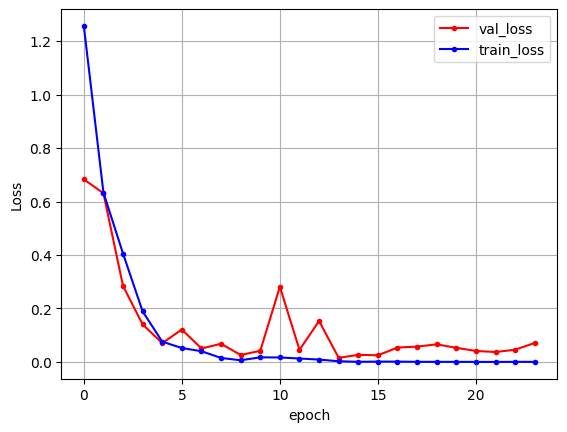

In [33]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']

plt.plot(val_loss, 'r.-', label = 'val_loss')
plt.plot(train_loss, 'b.-', label = 'train_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [13]:
target = np.array([1]*len(img_path_ad) + [0]*len(img_path_normal))

def img_prep(x):
    x = keras.preprocessing.image.load_img(x, target_size=(150, 150))
    x = keras.preprocessing.image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    x = keras.applications.vgg16.preprocess_input(x)
    
    return x

In [21]:
imgs = np.zeros((0, 150, 150, 3), np.float32)

for i in img_paths:
    x = img_prep(i)
    imgs = np.append(imgs, x, axis=0)
    
print(imgs.shape)

(280, 150, 150, 3)


In [22]:
X_train, X_val, y_train, y_val = train_test_split(imgs, target, test_size=0.2,
                                                  shuffle=True)

print(X_train.shape)
print(X_val.shape)

(224, 150, 150, 3)
(56, 150, 150, 3)


In [23]:
transfer_vgg16 = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

transfer_vgg16.trainable = False
transfer_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [24]:
finetun_vgg16 = keras.models.Sequential()
finetun_vgg16.add(transfer_vgg16)
finetun_vgg16.add(keras.layers.Flatten())
finetun_vgg16.add(keras.layers.Dense(64, activation='relu'))
finetun_vgg16.add(keras.layers.Dropout(0.2))
finetun_vgg16.add(keras.layers.Dense(1, activation='sigmoid'))
finetun_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                524352    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
finetun_vgg16.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['acc'])
early_stop = keras.callbacks.EarlyStopping(patience=5)
check_model = keras.callbacks.ModelCheckpoint(filepath='./finetun_model.hdf5',
                                              save_best_only=True)

In [26]:
history = finetun_vgg16.fit(X_train, y_train, epochs=100,
                        batch_size=20,
                        validation_data=(X_val, y_val),
                        callbacks = [early_stop, check_model])

Epoch 1/100
12/12 [==============================] - 27s 2s/step - loss: 5.9583 - acc: 0.5982 - val_loss: 1.1551 - val_acc: 0.8393
Epoch 2/100
12/12 [==============================] - 27s 2s/step - loss: 0.3470 - acc: 0.9375 - val_loss: 0.2518 - val_acc: 0.9464
Epoch 3/100
12/12 [==============================] - 26s 2s/step - loss: 0.1276 - acc: 0.9554 - val_loss: 0.2819 - val_acc: 0.9464
Epoch 4/100
12/12 [==============================] - 27s 2s/step - loss: 0.1057 - acc: 0.9732 - val_loss: 0.2565 - val_acc: 0.9464
Epoch 5/100
12/12 [==============================] - 26s 2s/step - loss: 0.0702 - acc: 0.9688 - val_loss: 0.1035 - val_acc: 0.9643
Epoch 6/100
12/12 [==============================] - 27s 2s/step - loss: 0.0357 - acc: 0.9866 - val_loss: 0.1899 - val_acc: 0.9464
Epoch 7/100
12/12 [==============================] - 26s 2s/step - loss: 0.0269 - acc: 0.9866 - val_loss: 0.1355 - val_acc: 0.9464
Epoch 8/100
12/12 [==============================] - 26s 2s/step - loss: 0.0178 - a

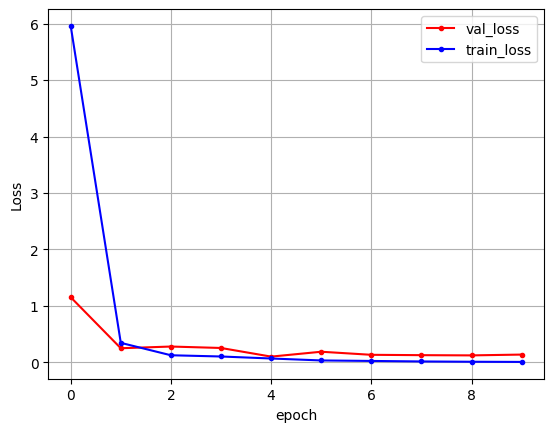

In [27]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']

plt.plot(val_loss, 'r.-', label = 'val_loss')
plt.plot(train_loss, 'b.-', label = 'train_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()